

```
# This is formatted as code
```

1. **Define the Problem**
* Identify the Business Problem: Understand the business context and define the problem you are trying to solve.
*Define the Goals: Clearly state the objectives and what success looks like.



**2. Collect Data**
* Identify Data Sources: Determine where to get the data from (databases, web scraping, APIs, etc.).
* Gather Data: Collect the data required for the analysis.
* Understand Data Privacy: Ensure compliance with data privacy and protection regulations.


**3. Explore and Preprocess Data**
* Understand the Data: Perform initial analysis to understand the data (types, structure, missing values).
* Clean the Data: Handle missing values, remove duplicates, correct errors, etc.
* Transform the Data: Feature engineering, scaling, encoding categorical variables, etc.
* Visualize the Data: Use visualizations to gain insights and understand data distributions and relationships.

**4. Modeling**
* Select the Model: Choose the appropriate modeling techniques (e.g., regression, classification, clustering).
* Train the Model: Split the data into training and test sets and train the model on the training set.
* Evaluate the Model: Use metrics to evaluate model performance on the test set.

# **Student Performance (Multiple Linear Regression)**

#### **Description:**
 The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### **Variables:/ features/input**
* Hours Studied: The total number of hours spent studying by each student.
* Previous Scores: The scores obtained by students in previous tests.
* Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
* Sleep Hours: The average number of hours of sleep the student had per day.
* Sample Question Papers Practiced: The number of sample question papers the student practiced.


#### **Target Variable/target/output:**

* Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

# **1 . Load datasets**

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/students perfomance - mark.csv")

In [ ]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [ ]:
data.shape

(10000, 6)

# **2. data pre processing**

**checking duplicates**

In [ ]:
data.duplicated().sum()

127

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
data.columns


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

# **checking** outlier

In [ ]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
nu=data.select_dtypes("number")

In [ ]:
nu.skew()

,0
Hours Studied,-0.003348
Previous Scores,0.005581
Sleep Hours,-0.041350
Sample Question Papers Practiced,-0.034893
Performance Index,-0.000412


okay 👌

<Axes: >

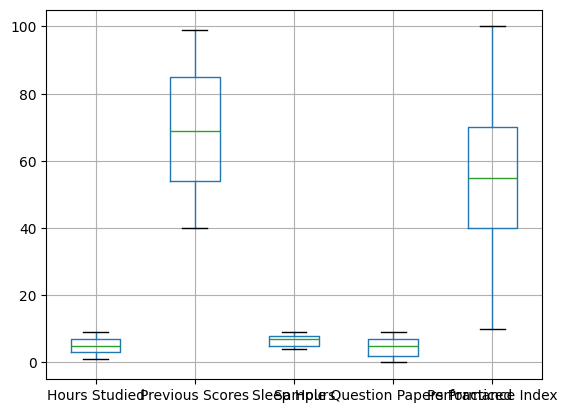

In [ ]:
nu.boxplot()

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

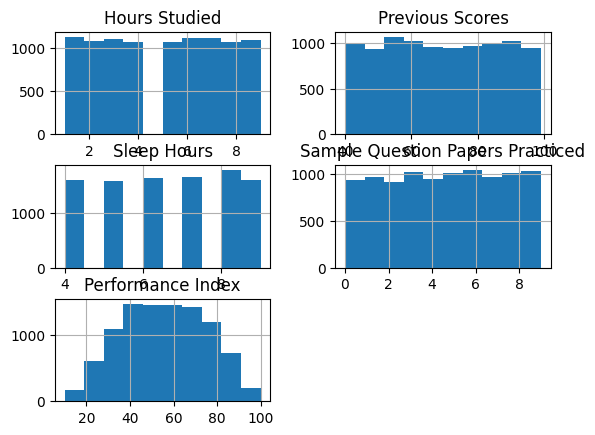

In [ ]:
nu.hist()

In [ ]:
#

# **visualization**

In [ ]:
corr=nu.corr()
import seaborn as sns
corr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000


<Axes: >

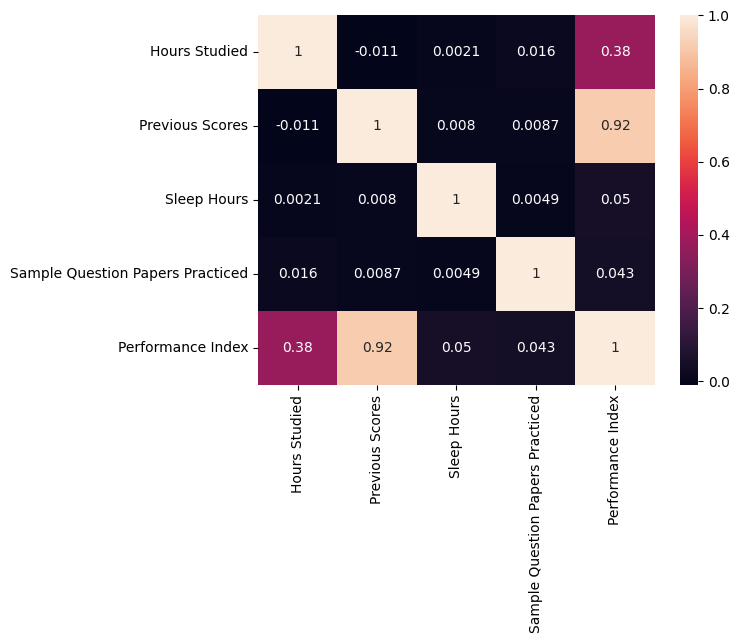

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder #encoding
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [ ]:
label_encoder = LabelEncoder()
data['Extracurricular Activities'] = label_encoder.fit_transform(data['Extracurricular Activities'])#converting yes-1 no-0


<ipython-input-21-d66e9e27e85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Extracurricular Activities'] = label_encoder.fit_transform(data['Extracurricular Activities'])#converting yes-1 no-0


In [ ]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [ ]:
# Features X column names
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = data['Performance Index'] #y target output
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 9873, dtype: int64

In [ ]:

# Scaling converting to std unit
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape #QUESTION TO TRAIN

(7898, 5)

In [ ]:
y_train.shape #ANS TO TRAIN

(7898,)

In [ ]:
X_test.shape

(1975, 5)

In [ ]:
y_test.shape

(1975,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

y_pred #PREDICTED

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

In [ ]:
import pandas as pd

# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})

print(results_df)


      Actual Values  Predicted Values
6099             47         46.480013
106              76         80.285379
9265             62         61.065188
4707             23         22.706315
2155             76         74.836868
...             ...               ...
8732             19         18.277835
3112             39         40.310084
5297             77         77.084436
6116             88         86.246766
5088             34         35.879338

[1975 rows x 2 columns]


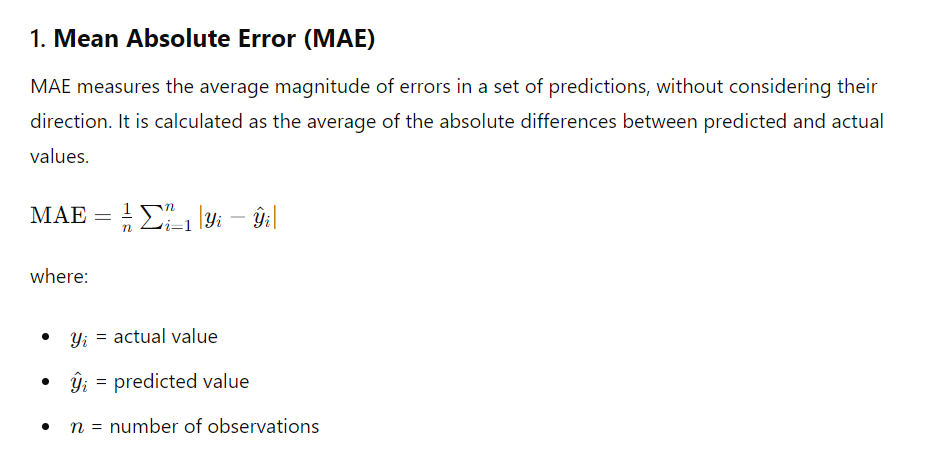

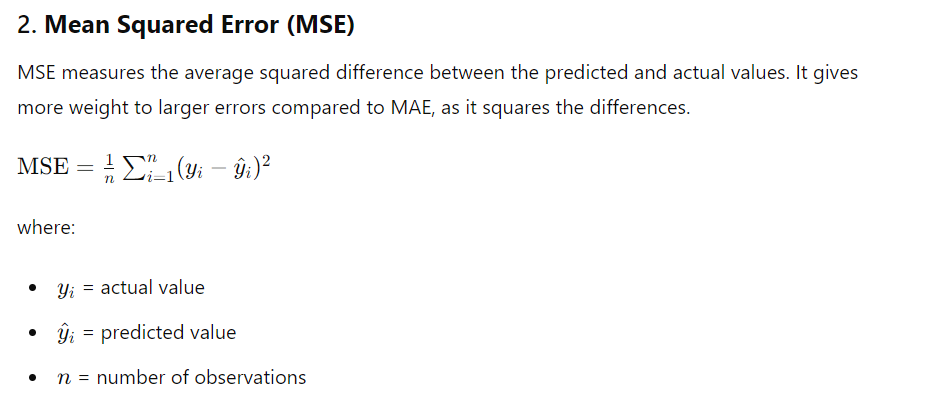

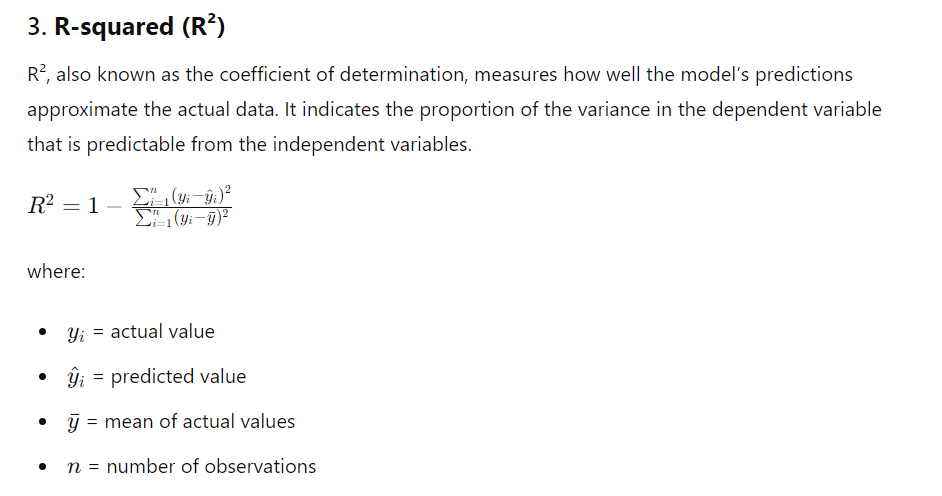

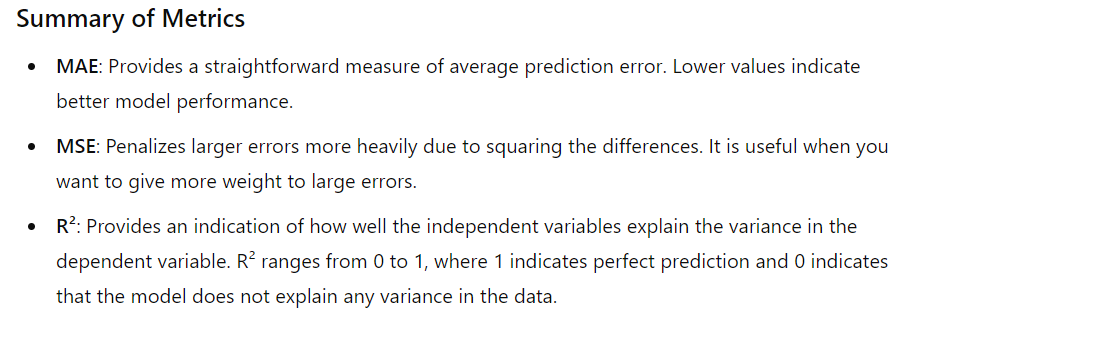

In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')



MAE: 1.6469703984255566
MSE: 4.305900938538476
R2: 0.9884301209927054
